$\newcommand{\tens}[1]{\mathbf{#1}}$

In order to be precise, let me re-define the Fourier series and DFT. The fourier series is defined as:

DFT and iFDT are:
\begin{align}
  DFT[f]_\tens{k} &= \sum_{\tens l=0}^{N-1} f_\tens{l} e^{-i \frac{2\pi  \tens k \cdot \tens l}{N}}\\
  DFT^{-1}[g]_\tens{m} &= \frac{1}{N^2} \sum_{\tens k=0}^{N-1} g_\tens{k} e^{i \frac{2\pi  \tens k \cdot \tens m}{N}}
\end{align}

The Fourier series coefficients are given by:

\begin{align}
  \hat{f}_\tens{k} &= \frac{1}{L^2}\iint_0^L f(\tens x) e^{-i\frac{2\pi \tens k \cdot \tens x}{L}} \tens dx\\
            &= \frac{1}{L^2}  \iint_0^N f(\tens y\frac{L}{N}) e^{-i\frac{2\pi \tens k \cdot \tens y}{N}} \tens dy \frac{L^2}{N^2} \\
            & \simeq \frac{1}{N^2}\sum_{\tens l=0}^{N-1} f(\tens l\frac{L}{N}) e^{-i \frac{2\pi \tens k \cdot \tens l}{N}} \\
            &= \frac{1}{N^2}\sum_{\tens l=0}^{N-1} f_\tens{l} e^{-i \frac{2\pi \tens k \cdot \tens l}{N}} =  \frac{1}{N^2} DFT[f]_\tens{k}
\end{align}

The fourier series is approximated with DFT as:

\begin{align}
  f(\tens x) = \sum_{\tens k=-\infty}^\infty \hat{f}_\tens{k} e^{i\frac{2\pi  \tens k \cdot \tens x}{L}}
  \simeq \sum_{\tens k=-N/2+1}^{N/2} \hat{f}_\tens{k} e^{i \frac{2\pi \tens k \cdot \tens x}{L}}
  = \frac{1}{N^2}  \sum_{\tens k=-N/2+1}^{N/2} DFT[f]_\tens{k} e^{i \frac{2\pi \tens k \cdot \tens x}{L}}
\end{align}

So that its derivative is:

\begin{align}
  \nabla_x f(\tens{x}_\tens{m}) &= \sum_{\tens k=-N/2+1}^{N/2} i \frac{2\pi k_x}{L} \hat{f}_\tens{k} e^{i\frac{2\pi  \tens k \cdot \tens x}{L}}
  = \frac{1}{N^2} \sum_{\tens k=-N/2+1}^{N/2} i \frac{2\pi k_x}{L}DFT[f]_\tens{k} e^{i\frac{2\pi  \tens k \cdot \tens x}{L}} \\
  &= DFT^{-1}[ i \frac{2\pi k_x}{L} DFT[f]]_\tens{m}
\end{align}
So that what we want to compute is:
\begin{align}
DFT[\nabla_x f]_\tens{k} = i \frac{2\pi k_x}{L}
\end{align}
Or for the laplacian:
\begin{align}
DFT[\Delta f]_\tens{k} = - \frac{4\pi^2 }{L^2} \left(k_x^2 + k_y^2\right) = q_x^2 + q_y^2 
\end{align}

Concerning the solution of the 1D problem, please find below a working code for finding the equilibrium solution:

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
N = 128
L = 2
T = np.zeros((N,N))
q = np.zeros((N,N))

There is a subtlety here about the heat sources, the distribution (punctual) representation is:

$q(x, y) = \delta(x+1/2) + \delta(x-1/2)$

with $\delta$ the dirac delta function, and the normalization of the dirac, makes it scale as $N$, see below:

In [4]:
q[int(N/4), :] = -N
q[int(3*N/4), :] = N

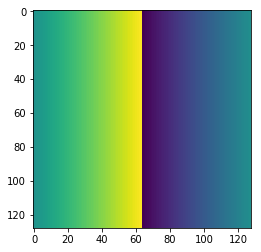

In [13]:
freqs = np.fft.fftfreq(N)*2*np.pi/L*N
freqs_2d = np.einsum('i,j->ij',np.ones(N),freqs)
plt.imshow(freqs_2d)

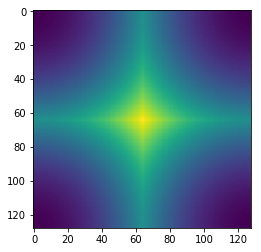

In [15]:
freqs = freqs_2d**2 + freqs_2d.T**2
freqs[0, 0] = 1.
plt.imshow(freqs)

In [7]:
T = np.fft.fft2(q)/freqs
T[0,0] = 0.

In [8]:
T = np.fft.ifft2(T)

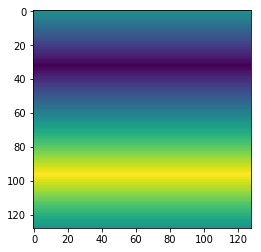

In [9]:
plt.imshow(T.real)

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

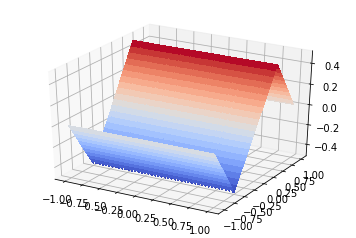

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.linspace(-1, 1, N)
X_2d = np.einsum('i,j->ij',np.ones(N),X)

surf = ax.plot_surface(X_2d, X_2d.T, T.real, cmap=cm.coolwarm,
                        antialiased=False)

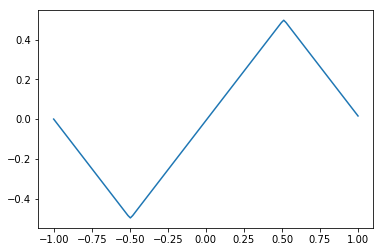

In [12]:
plt.plot(X_2d[0, :], T.real[:, 0])